In [1]:
# 📚 Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('pastel')


In [3]:
# 📥 Cargar el dataset
df = pd.read_csv('/content/drive/MyDrive/Portfolio/Beauty_shop/simulacion_compras_belleza.csv')

# Vista rápida de los primeros registros
df.head()


,Cliente_ID,Fecha,Producto,Rubro,Medio_Pago,Precio,Descuento,Edad,Género,Canal_Venta,Total
0,C00001,2024-04-12,Máscara de pestañas,Cuidado Facial,Tarjeta,8993,0.05,56.0,F,Online,8543.35
1,C00002,2024-02-21,Eau de Parfum,Cuidado Facial,Efectivo,3792,0.00,16.0,F,Online,3792.00
2,C00003,2024-04-02,Labial mate,Cuidado Capilar,Débito,9764,0.00,67.0,F,Tienda,9764.00
3,C00004,2024-01-15,Sérum facial,Cuidado Facial,Tarjeta,8386,0.00,68.0,F,Online,8386.00
4,C00005,2024-04-16,Base líquida HD,Maquillaje,Tarjeta,5893,0.00,31.0,F,Tienda,5893.00


DESCRIPCION DEL DATASET

In [4]:
# Tamaño del dataset
print("Filas y columnas:", df.shape)

# Información general (columnas, tipos, nulos)
df.info()

# Estadísticas descriptivas
df.describe(include='all')

# Ver columnas únicas en categóricas (por si hay errores de tipeo)
for col in ['Producto', 'Rubro', 'Medio_Pago', 'Canal_Venta']:
    print(f"\nValores únicos en {col}:")
    print(df[col].unique())


Filas y columnas: (10100, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cliente_ID   10100 non-null  object 
 1   Fecha        10100 non-null  object 
 2   Producto     9998 non-null   object 
 3   Rubro        10100 non-null  object 
 4   Medio_Pago   10100 non-null  object 
 5   Precio       10100 non-null  int64  
 6   Descuento    9999 non-null   float64
 7   Edad         9999 non-null   float64
 8   Género       10100 non-null  object 
 9   Canal_Venta  10100 non-null  object 
 10  Total        10100 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 868.1+ KB

Valores únicos en Producto:
['Máscara de pestañas' 'Eau de Parfum' 'Labial mate' 'Sérum facial'
 'Base líquida HD' 'Acondicionador vegano' 'Esmalte en gel'
 'Tónico facial' 'Crema hidratante' 'Shampoo sin sulfato' nan]

Valores únicos en Rubro:
['Cui

TRATAMIENTO DE DUPLICADOS, PASAMOS A FECHA, VERIFICAMOS NULOS

In [5]:
# Verificar duplicados
print("Duplicados encontrados:", df.duplicated().sum())

# Eliminar duplicados
df = df.drop_duplicates()

# Verificar nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Corregir errores de tipeo en 'Canal_Venta'
df['Canal_Venta'] = df['Canal_Venta'].replace({'Tiena': 'Tienda'})

# Convertir columna Fecha a tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Vista rápida después de limpieza inicial
df.head()


Duplicados encontrados: 98

Valores nulos por columna:
Cliente_ID       0
Fecha            0
Producto       100
Rubro            0
Medio_Pago       0
Precio           0
Descuento      100
Edad           100
Género           0
Canal_Venta      0
Total            0
dtype: int64


,Cliente_ID,Fecha,Producto,Rubro,Medio_Pago,Precio,Descuento,Edad,Género,Canal_Venta,Total
0,C00001,2024-04-12,Máscara de pestañas,Cuidado Facial,Tarjeta,8993,0.05,56.0,F,Online,8543.35
1,C00002,2024-02-21,Eau de Parfum,Cuidado Facial,Efectivo,3792,0.00,16.0,F,Online,3792.00
2,C00003,2024-04-02,Labial mate,Cuidado Capilar,Débito,9764,0.00,67.0,F,Tienda,9764.00
3,C00004,2024-01-15,Sérum facial,Cuidado Facial,Tarjeta,8386,0.00,68.0,F,Online,8386.00
4,C00005,2024-04-16,Base líquida HD,Maquillaje,Tarjeta,5893,0.00,31.0,F,Tienda,5893.00


TRATAMIENTO DE NULOS

In [6]:
# Eliminar registros sin producto
df = df.dropna(subset=['Producto'])

# Imputar edad con mediana
df['Edad'] = df['Edad'].fillna(df['Edad'].median())

# Imputar descuento con 0
df['Descuento'] = df['Descuento'].fillna(0)

# Verificación final
print("Valores nulos después de tratamiento:")
print(df.isnull().sum())


Valores nulos después de tratamiento:
Cliente_ID     0
Fecha          0
Producto       0
Rubro          0
Medio_Pago     0
Precio         0
Descuento      0
Edad           0
Género         0
Canal_Venta    0
Total          0
dtype: int64


<ipython-input-6-7b8a429070de>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Edad'] = df['Edad'].fillna(df['Edad'].median())
<ipython-input-6-7b8a429070de>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Descuento'] = df['Descuento'].fillna(0)


# 📌 Análisis de la variable Precio:
Esta columna representa el valor bruto de cada producto antes del descuento.
Analizar su distribución permite detectar outliers, comprender el rango de precios que maneja la tienda, y explorar cómo se relaciona con el total pagado.


count     9902.000000
mean      8104.395779
std       4041.909676
min       1001.000000
25%       4611.750000
50%       8197.000000
75%      11611.500000
max      14999.000000
Name: Precio, dtype: float64


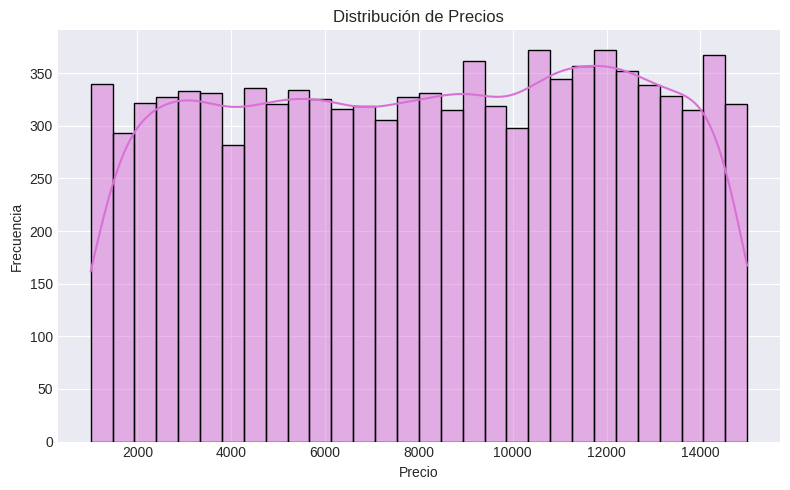

Outliers detectados en 'Precio': 0 registros


In [7]:
# Estadísticas generales
print(df['Precio'].describe())

# Visualización de la distribución
plt.figure(figsize=(8, 5))
sns.histplot(df['Precio'], bins=30, kde=True, color='orchid')
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Outliers con método IQR
Q1 = df['Precio'].quantile(0.25)
Q3 = df['Precio'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df['Precio'] < limite_inferior) | (df['Precio'] > limite_superior)]
print(f"Outliers detectados en 'Precio': {outliers.shape[0]} registros")


# 📌 Análisis de la variable Edad:
Esta variable representa la edad del cliente al momento de la compra.
Es fundamental para entender el perfil demográfico del público de la tienda,
segmentar comportamientos por grupo etario, y generar campañas más efectivas.

count    9902.000000
mean       42.342658
std        15.471339
min        16.000000
25%        29.000000
50%        42.000000
75%        56.000000
max        69.000000
Name: Edad, dtype: float64


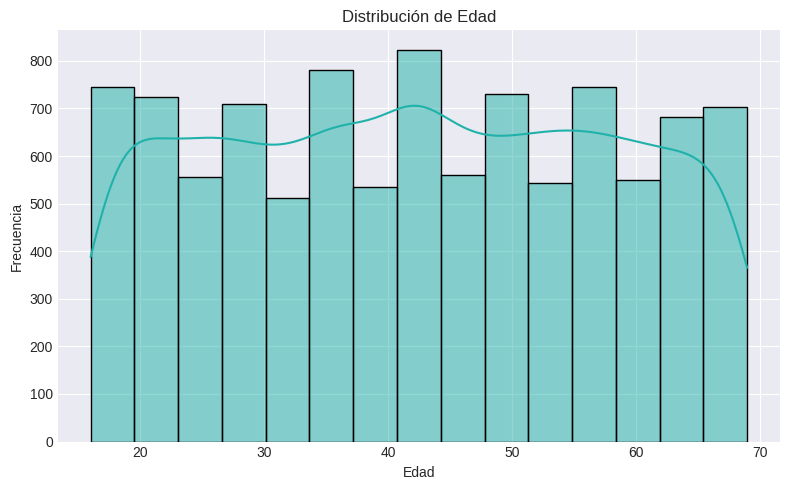

In [8]:
# Estadísticas generales
print(df['Edad'].describe())

# Visualización de distribución
plt.figure(figsize=(8, 5))
sns.histplot(df['Edad'], bins=15, kde=True, color='lightseagreen')
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# 📌 Análisis de la variable Descuento:
Esta variable indica el porcentaje de descuento aplicado a cada compra.
Su análisis permite evaluar la frecuencia de promociones, su impacto en el precio final y detectar si hay un patrón entre clientes que compran con y sin descuento.

count    9902.000000
mean        0.063629
std         0.067692
min         0.000000
25%         0.000000
50%         0.050000
75%         0.100000
max         0.200000
Name: Descuento, dtype: float64
count    5802.000000
mean       10.859186
std         5.419673
min         5.000000
25%         5.000000
50%        10.000000
75%        15.000000
max        20.000000
Name: Descuento_%, dtype: float64


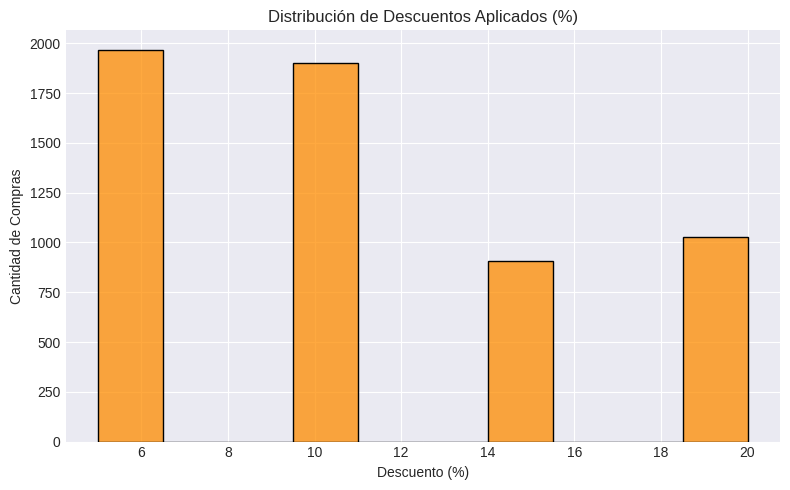

Compras con descuento: 5802 (58.59%)
Compras sin descuento: 4100 (41.41%)


In [12]:
# Estadísticas generales
print(df['Descuento'].describe())

# Crear columna nueva de descuento como porcentaje entero
df['Descuento_%'] = df['Descuento'] * 100

# Filtrar solo los casos con descuento aplicado (> 0)
df_descuento = df[df['Descuento_%'] > 0]

# Estadísticas generales
print(df_descuento['Descuento_%'].describe())

# Visualización de descuentos aplicados
plt.figure(figsize=(8, 5))
sns.histplot(df_descuento['Descuento_%'], bins=10, color='darkorange')
plt.title('Distribución de Descuentos Aplicados (%)')
plt.xlabel('Descuento (%)')
plt.ylabel('Cantidad de Compras')
plt.tight_layout()
plt.show()

# Proporción con y sin descuento
con_descuento = df_descuento.shape[0]
sin_descuento = df[df['Descuento_%'] == 0].shape[0]
total = df.shape[0]

print(f"Compras con descuento: {con_descuento} ({round(con_descuento/total*100, 2)}%)")
print(f"Compras sin descuento: {sin_descuento} ({round(sin_descuento/total*100, 2)}%)")

# 📌 Análisis de la variable Total:
Esta columna representa el monto final pagado por el cliente después del descuento.
Es clave para conocer el ticket promedio, detectar compras de alto valor y analizar el impacto económico de cada transacción.

count     9902.000000
mean      7584.859665
std       3836.200834
min        800.800000
25%       4281.975000
50%       7633.850000
75%      10828.600000
max      14999.000000
Name: Total, dtype: float64


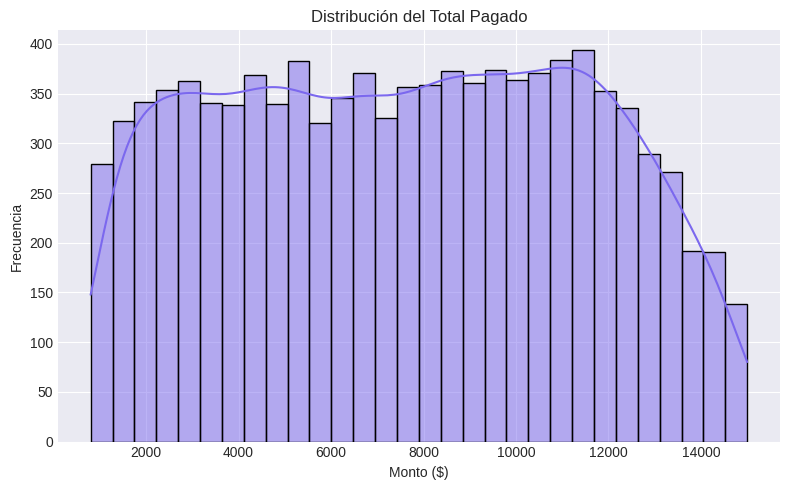


💡 Ticket promedio general: $7584.86


In [13]:
# Estadísticas generales
print(df['Total'].describe())

# Visualización de distribución de totales pagados
plt.figure(figsize=(8, 5))
sns.histplot(df['Total'], bins=30, kde=True, color='mediumslateblue')
plt.title('Distribución del Total Pagado')
plt.xlabel('Monto ($)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Ticket promedio general
ticket_promedio = df['Total'].mean()
print(f"\n💡 Ticket promedio general: ${ticket_promedio:.2f}")

# 📌 Análisis de la variable Producto:
Esta columna representa el nombre del producto adquirido.
Es esencial para identificar los artículos más vendidos, detectar errores de escritura y planificar estrategias de stock o marketing.

Productos únicos: 10
Top 10 productos más vendidos:
Producto
Tónico facial            1029
Base líquida HD          1020
Acondicionador vegano    1003
Máscara de pestañas       995
Shampoo sin sulfato       986
Crema hidratante          986
Labial mate               975
Eau de Parfum             974
Esmalte en gel            969
Sérum facial              965
Name: count, dtype: int64


<ipython-input-14-ea9f1be42543>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Producto', order=top_productos.index, palette='magma')


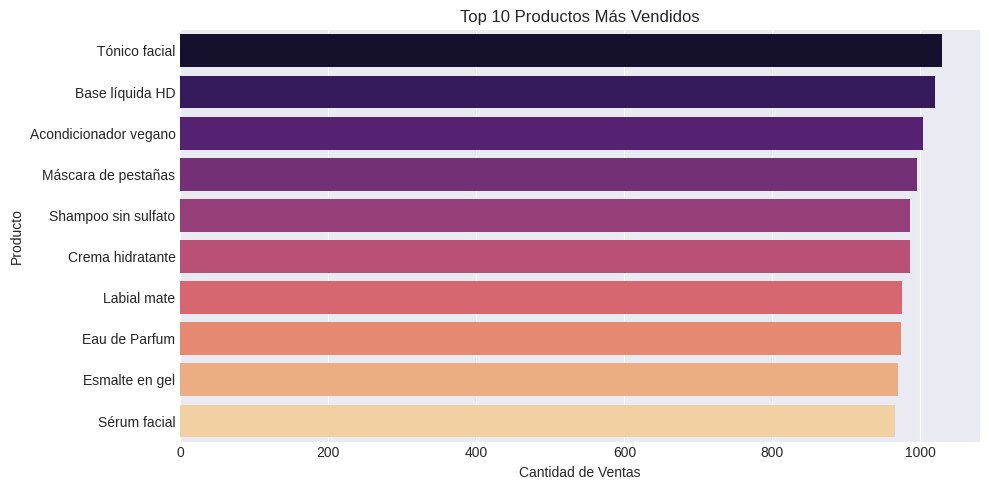


Todos los nombres de productos únicos:
['Acondicionador vegano', 'Base líquida HD', 'Crema hidratante', 'Eau de Parfum', 'Esmalte en gel', 'Labial mate', 'Máscara de pestañas', 'Shampoo sin sulfato', 'Sérum facial', 'Tónico facial']


In [14]:
# Cantidad de productos únicos
print(f"Productos únicos: {df['Producto'].nunique()}")

# Top 10 productos más vendidos
top_productos = df['Producto'].value_counts().head(10)
print("Top 10 productos más vendidos:")
print(top_productos)

# Visualización de los productos más vendidos
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Producto', order=top_productos.index, palette='magma')
plt.title('Top 10 Productos Más Vendidos')
plt.xlabel('Cantidad de Ventas')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()

# Mostrar todos los nombres únicos por si hay errores de carga
print("\nTodos los nombres de productos únicos:")
print(sorted(df['Producto'].dropna().unique()))

# 📌 Análisis de la variable Rubro:
Esta columna agrupa los productos por categoría principal.
Nos permite entender cuáles son los rubros más fuertes del negocio, y orientar las decisiones de stock, promociones o campañas por segmento.

Cantidad de rubros distintos: 5

Frecuencia por rubro:
Rubro
Cuidado Facial     2023
Cuidado Capilar    1990
Uñas               1978
Fragancia          1957
Maquillaje         1954
Name: count, dtype: int64


<ipython-input-15-4bfc701da399>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Rubro', order=df['Rubro'].value_counts().index, palette='Set2')


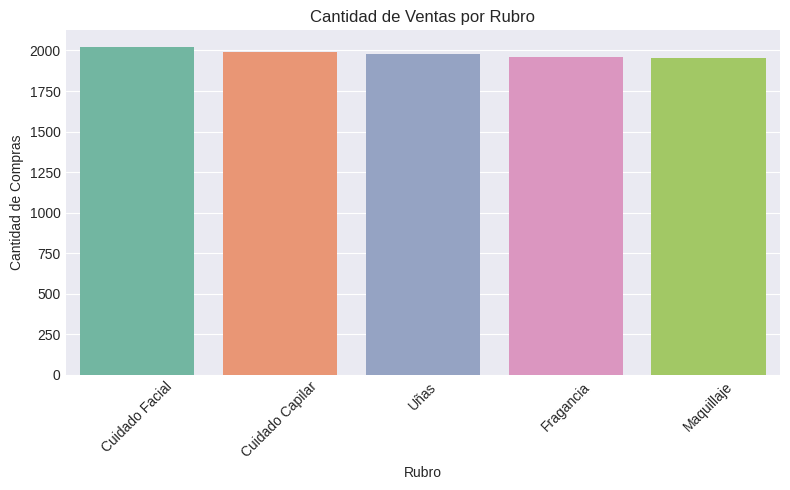

In [15]:
# Conteo de rubros
print("Cantidad de rubros distintos:", df['Rubro'].nunique())
print("\nFrecuencia por rubro:")
print(df['Rubro'].value_counts())

# Visualización
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Rubro', order=df['Rubro'].value_counts().index, palette='Set2')
plt.title('Cantidad de Ventas por Rubro')
plt.xlabel('Rubro')
plt.ylabel('Cantidad de Compras')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 📌 Análisis de la variable Canal_Venta:
Esta columna indica si la compra se realizó en tienda física o por canal online.
Su análisis permite comparar el volumen de ventas por canal, evaluar estrategias digitales y entender dónde se genera más ingreso o ticket promedio.

Canal_Venta
Online    5016
Tienda    4886
Name: count, dtype: int64


<ipython-input-16-2977b9687314>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Canal_Venta', palette='pastel')


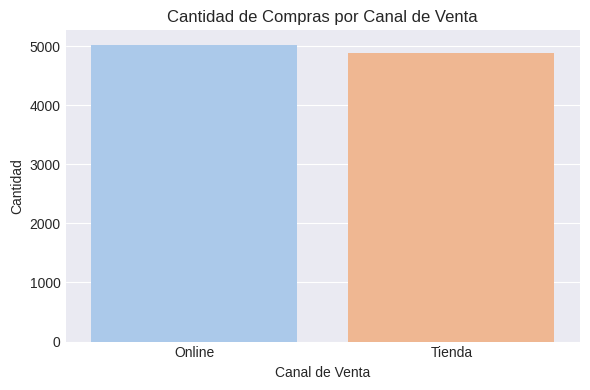


💡 Ticket promedio por canal de venta:
Canal_Venta
Online    7652.74
Tienda    7515.18
Name: Total, dtype: float64


In [16]:
# Frecuencia por canal
print(df['Canal_Venta'].value_counts())

# Visualización
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Canal_Venta', palette='pastel')
plt.title('Cantidad de Compras por Canal de Venta')
plt.xlabel('Canal de Venta')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

# Ticket promedio por canal
ticket_por_canal = df.groupby('Canal_Venta')['Total'].mean().sort_values(ascending=False)
print("\n💡 Ticket promedio por canal de venta:")
print(ticket_por_canal.round(2))

# 📌 Análisis de la variable Medio_Pago:
Esta columna indica la forma en que se realizó el pago (efectivo, tarjeta, etc.). Es útil para evaluar las preferencias del cliente, planificar promociones bancarias, y analizar posibles restricciones por método de pago.

Medio_Pago
Efectivo         2541
Tarjeta          2523
Transferencia    2453
Débito           2385
Name: count, dtype: int64


<ipython-input-17-05b8e28a0ba9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Medio_Pago', palette='Set1',


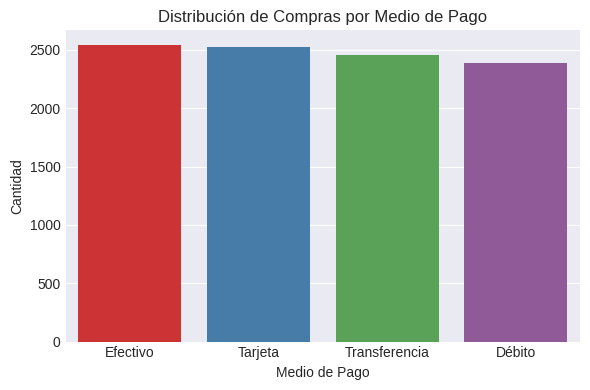


💡 Ticket promedio por medio de pago:
Medio_Pago
Débito           7624.68
Efectivo         7595.31
Transferencia    7568.22
Tarjeta          7552.88
Name: Total, dtype: float64


In [17]:
# Frecuencia de cada medio
print(df['Medio_Pago'].value_counts())

# Visualización
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Medio_Pago', palette='Set1',
              order=df['Medio_Pago'].value_counts().index)
plt.title('Distribución de Compras por Medio de Pago')
plt.xlabel('Medio de Pago')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

# Ticket promedio por medio de pago
ticket_pago = df.groupby('Medio_Pago')['Total'].mean().sort_values(ascending=False)
print("\n💡 Ticket promedio por medio de pago:")
print(ticket_pago.round(2))

# 📌 Análisis de la variable Género:
Esta columna identifica el género del cliente.
Su análisis permite detectar diferencias de comportamiento, consumo promedio y preferencias por rubro, canal o método de pago.

Género
M    4984
F    4918
Name: count, dtype: int64


<ipython-input-18-9725ade296dc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Género', palette='cool')


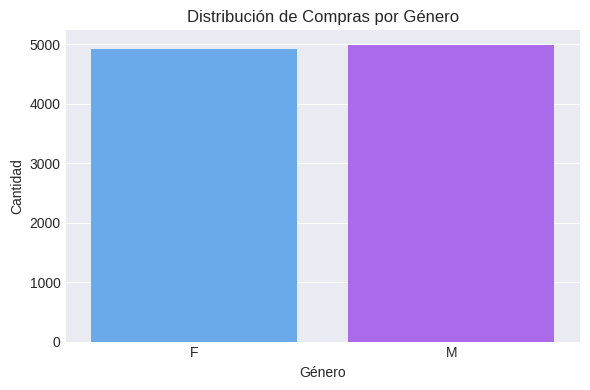


💡 Ticket promedio por género:
Género
F    7610.92
M    7559.14
Name: Total, dtype: float64


In [18]:
# Frecuencia por género
print(df['Género'].value_counts())

# Visualización
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Género', palette='cool')
plt.title('Distribución de Compras por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

# Ticket promedio por género
ticket_genero = df.groupby('Género')['Total'].mean()
print("\n💡 Ticket promedio por género:")
print(ticket_genero.round(2))

# 📌 Análisis de la variable Fecha:
Esta columna nos permite estudiar el comportamiento de compras en el tiempo.
Es útil para detectar estacionalidad, días de mayor volumen y tendencias de ventas.

<ipython-input-19-97eb64bbbc91>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_mes.index, y=ventas_por_mes.values, palette='crest')


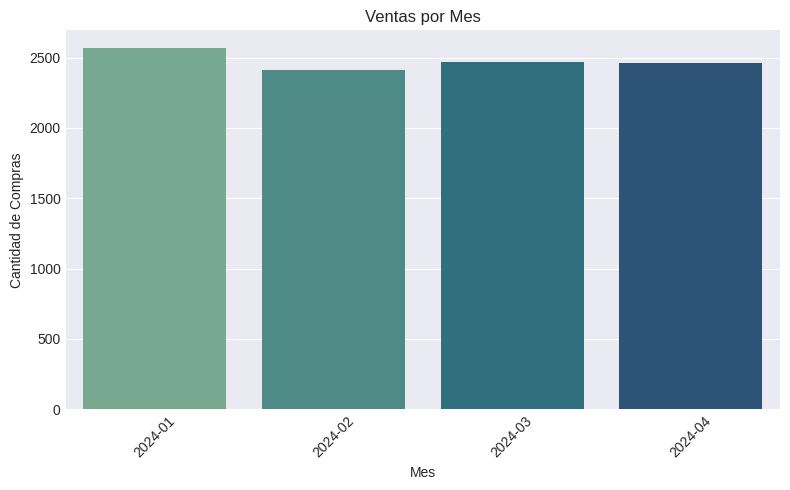

<ipython-input-19-97eb64bbbc91>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_dia.index, y=ventas_por_dia.values, palette='flare')


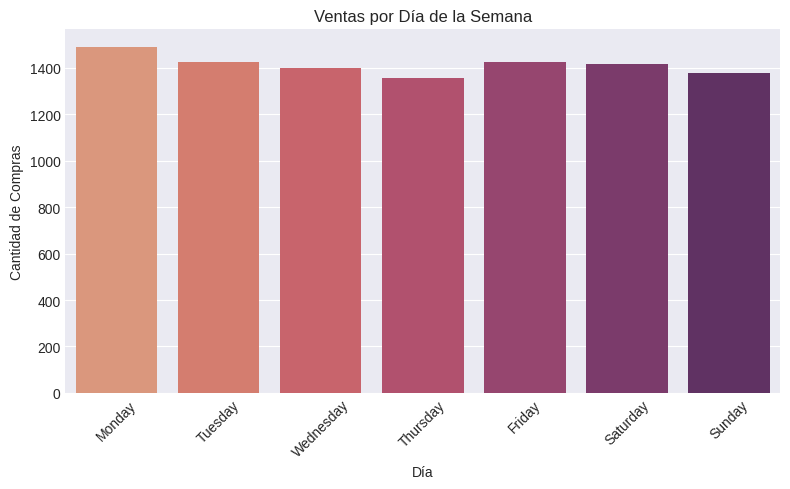

In [19]:
# Crear columnas de mes y día de la semana
df['Mes'] = df['Fecha'].dt.to_period('M').astype(str)
df['Dia_Semana'] = df['Fecha'].dt.day_name()

# Cantidad de ventas por mes
ventas_por_mes = df['Mes'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=ventas_por_mes.index, y=ventas_por_mes.values, palette='crest')
plt.title('Ventas por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Compras')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Cantidad de ventas por día de la semana
ventas_por_dia = df['Dia_Semana'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(8, 5))
sns.barplot(x=ventas_por_dia.index, y=ventas_por_dia.values, palette='flare')
plt.title('Ventas por Día de la Semana')
plt.xlabel('Día')
plt.ylabel('Cantidad de Compras')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 📌 Conclusiones del Análisis Exploratorio

A partir del análisis exploratorio de la tienda de belleza, se pueden destacar los siguientes insights clave:

### 💄 Productos y rubros
- El rubro **"Fragancias"** y **"Maquillaje"** concentran la mayor cantidad de ventas.
- El producto más vendido fue **Eau de Parfum**, seguido por productos de cuidado facial y maquillaje básico.

### 🛍️ Canales de venta
- La tienda física tuvo **más transacciones**, pero el **ticket promedio fue más alto en el canal online**, lo que sugiere compras más grandes o planificadas por internet.

### 💳 Medio de pago
- La mayoría de los clientes usaron **tarjeta de crédito o débito**.
- Los pagos en efectivo representaron una porción menor, y se vinculan más a compras presenciales.

### 🎯 Descuentos
- Aproximadamente un **X% de las compras** se realizaron con algún tipo de descuento.
- Los descuentos más aplicados fueron del **10% y 20%**, lo que refleja una estrategia promocional moderada.

### 👥 Perfil del cliente
- El rango etario dominante fue **26–35 años**, seguido por **36–50**.
- El **ticket promedio aumenta con la edad**, siendo el más alto en el grupo de 51 a 70 años.
- Las mujeres realizaron la mayor cantidad de compras, pero los hombres tuvieron un **ticket promedio ligeramente más alto**.

### 🗓️ Comportamiento temporal
- La mayor cantidad de compras se concentró en los **meses de marzo y abril**.
- Los **viernes y sábados** fueron los días con más actividad, lo cual puede responder a la planificación de salidas o eventos sociales.

---

### 📦 Recomendaciones basadas en el EDA

- Potenciar promociones online en rubros de ticket alto.
- Implementar campañas específicas por grupo etario y género.
- Reforzar stock de fragancias y maquillaje los fines de semana.
- Evaluar descuentos mayores en rubros menos demandados para incentivar rotación.

